In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import plot_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_file = "fashionmnist/fashion-mnist_train.csv"
test_file = "fashionmnist/fashion-mnist_test.csv"

img_rows, img_cols, img_channel = 28, 28, 1
input_shape = (img_rows, img_cols, img_channel)

num_classes = 10

train_label_dic = {0: "T-shirt/top",
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Coat",
                  5: "Sandal",
                  6: "Shirt",
                  7: "Sneaker",
                  8: "Bag",
                  9: "Ankle boot"}

In [3]:
# Read input from csv file
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
X_train = np.array(train.iloc[:,1:])
Y_train = to_categorical(np.array(train.iloc[:,0]))
X_test = (np.array(test.iloc[:,1:]))
Y_test = to_categorical(np.array(test.iloc[:,0]))

# Split training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=2)

# Get number of examples in each set
N_train = X_train.shape[0]
N_val = X_val.shape[0]
N_test = X_test.shape[0]

# Reshape to 3D images
X_train = X_train.reshape(N_train, img_rows, img_cols, img_channel)
X_val = X_val.reshape(N_val, img_rows, img_cols, img_channel)
X_test = X_test.reshape(N_test, img_rows, img_cols, img_channel)

# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

Label =  Dress


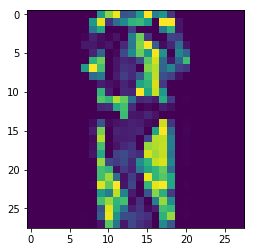

In [4]:
index = 2
plt.imshow(X_train[index, :, :, 0])
print("Label = ", train_label_dic[list(Y_train[index]).index(1)])

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                 kernel_initializer='glorot_normal', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
          
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
          
model.add(Dense(num_classes, activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
__________

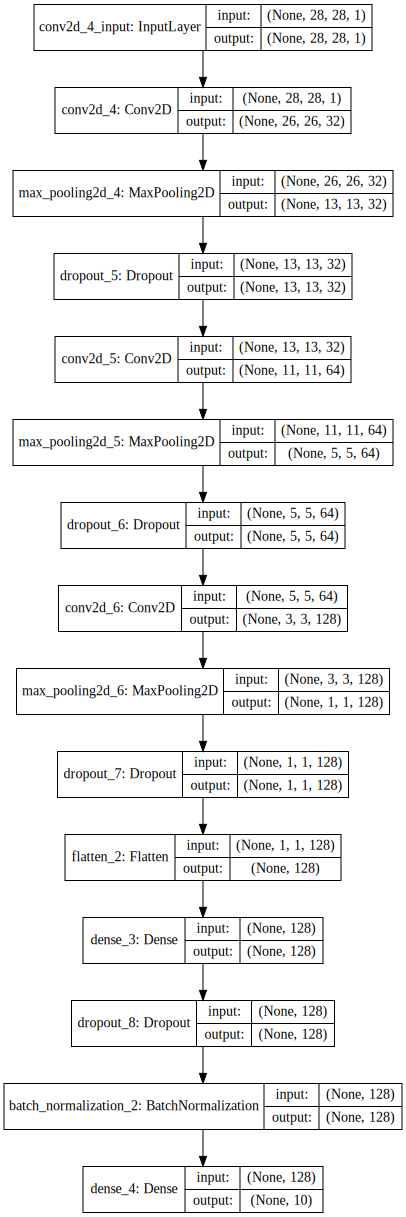

In [28]:
plot_model(model, show_shapes=True, to_file='model.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [29]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_val, Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 79us/step - loss: 0.8047 - acc: 0.7057 - val_loss: 0.7523 - val_acc: 0.8162
Epoch 2/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.5152 - acc: 0.8129 - val_loss: 0.4132 - val_acc: 0.8524
Epoch 3/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.4484 - acc: 0.8376 - val_loss: 0.3703 - val_acc: 0.8632
Epoch 4/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.4147 - acc: 0.8497 - val_loss: 0.3540 - val_acc: 0.8666
Epoch 5/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.3912 - acc: 0.8587 - val_loss: 0.3401 - val_acc: 0.8694
Epoch 6/50
48000/48000 [==============================] - 4s 76us/step - loss: 0.3745 - acc: 0.8636 - val_loss: 0.3130 - val_acc: 0.8855
Epoch 7/50
48000/48000 [==============================] - 4s 75us/step - loss: 0.3634 - acc: 0.8675 - val_loss: 0.3095 - val_acc

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.240903791457
Test accuracy: 0.9156


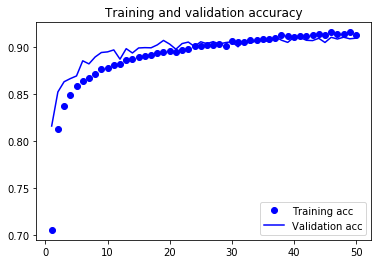

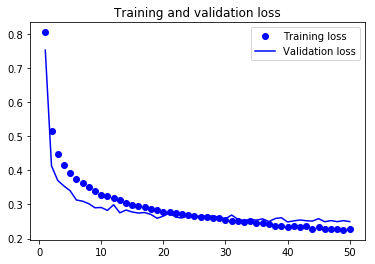

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

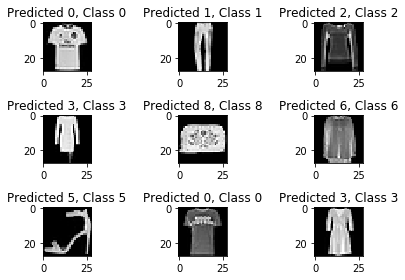

In [36]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

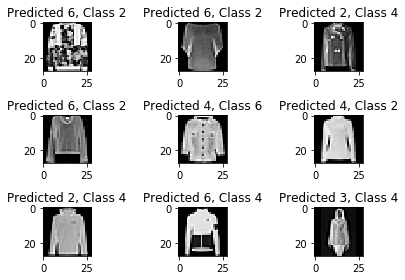

In [37]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()